**Описание проекта**


В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

In [ ]:
Описание данных
  * airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
  * balcony — число балконов
  * ceiling_height — высота потолков (м)
  * cityCenters_nearest — расстояние до центра города (м)
  * days_exposition — сколько дней было размещено объявление (от публикации до снятия)
  * first_day_exposition — дата публикации
  * floor — этаж
  * floors_total — всего этажей в доме
  * is_apartment — апартаменты (булев тип)
  * kitchen_area — площадь кухни в квадратных метрах (м²)
  * last_price — цена на момент снятия с публикации
  * living_area — жилая площадь в квадратных метрах (м²)
  * locality_name — название населённого пункта
  * open_plan — свободная планировка (булев тип)
  * parks_around3000 — число парков в радиусе 3 км
  * parks_nearest — расстояние до ближайшего парка (м)
  * ponds_around3000 — число водоёмов в радиусе 3 км
  * ponds_nearest — расстояние до ближайшего водоёма (м)
  * rooms — число комнат
  * studio — квартира-студия (булев тип)
  * total_area — площадь квартиры в квадратных метрах (м²)
  * total_images — число фотографий квартиры в объявлении

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t', decimal = ',')
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
df.info() # смотрим на общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

In [ ]:
# цикл для расчета колличества значений NaN в талице с ориентацией на колонки
num_of_nan = 0
list_of_nan = []
for i in range(0, len(df.columns)):
    num_of_nan = df[df.columns[i]].isnull().sum()
    if num_of_nan > 0:
        print(df.columns[i], ' : ', num_of_nan)
        list_of_nan.append(df.columns[i])

ceiling_height  :  9195
floors_total  :  86
living_area  :  1903
is_apartment  :  20924
kitchen_area  :  2278
balcony  :  11519
locality_name  :  49
airports_nearest  :  5542
cityCenters_nearest  :  5519
parks_around3000  :  5518
parks_nearest  :  15620
ponds_around3000  :  5518
ponds_nearest  :  14589
days_exposition  :  3181


In [ ]:
# Код ревьюера
df.isna().sum().where(lambda x : x > 0).dropna().astype('int')

ceiling_height          9195
floors_total              86
living_area             1903
is_apartment           20924
kitchen_area            2278
balcony                11519
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
dtype: int64

### Вывод

Таблица состоит из 22 колонок с данными трех типов: bool(2), int64(3), object(17).

Колличество строк в колонках не совпадает, значит есть пропущенные значения или ошибки. 
С помощью цикла были найдены все столбцы, содержащие значения NaN, а так же посчитано колличество таких значений, что менее важно на данном этапе


## Предобработка данных

### Преобразование типов данных

Для начала переведем численные значения из типа object в float с сохранением значений NaN. Так мы получаем возможность производить арифметические действия над этими столбцами. Можно преобразовать столбцы значения float в int, но я не вижу в этом особого смысла.

In [ ]:
list_to_numeric = ['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony',
 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest',
 'days_exposition']
for column in list_to_numeric:
    df[column] = pd.to_numeric(df[column], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Обработка значений NaN

Вернемся к списку столбцов с значениями nan и посмотрим, что можно с ними сделать.

In [ ]:
list_of_nan

['ceiling_height',
 'floors_total',
 'living_area',
 'is_apartment',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Для начала из списка list_of_nan выберем столбцы с численным типом и посмотрин на их распределения

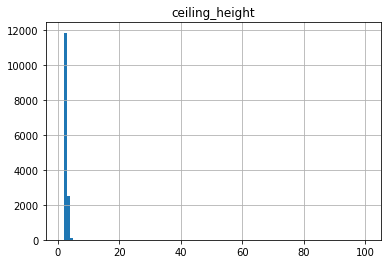

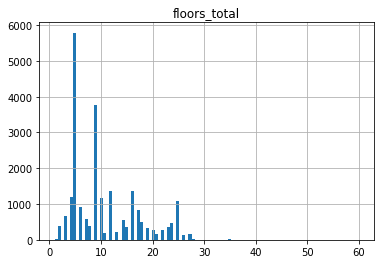

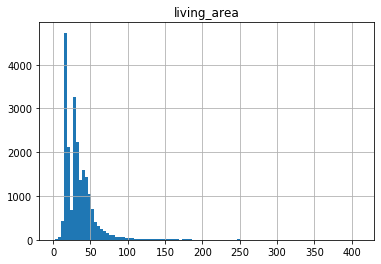

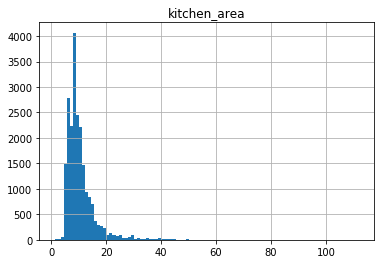

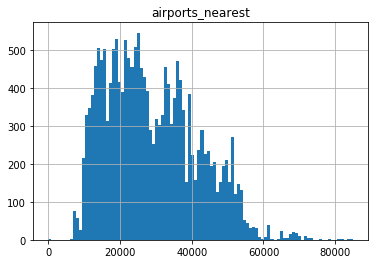

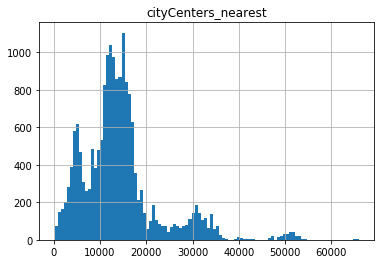

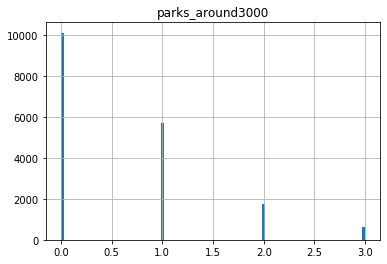

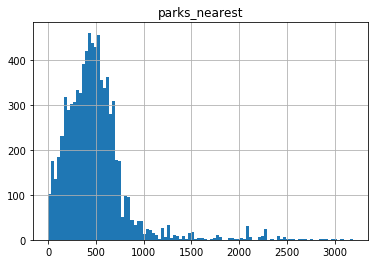

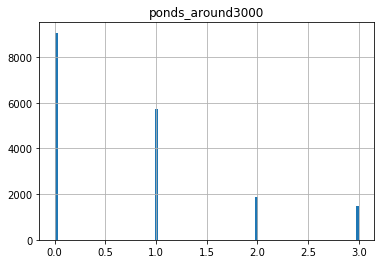

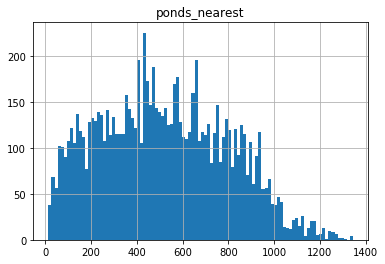

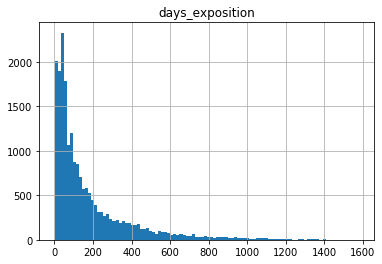

In [ ]:
list_of_nan_numeric = ['ceiling_height',  'floors_total',  'living_area',  'kitchen_area', 'airports_nearest',
 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for column in list_of_nan_numeric:
    df[column].hist(bins = 100)
    plt.title(column)                                                                                                   # fixed
    plt.show()

Все графики в той или иной мере похожи на распределение Пуассона, поэтому оптимальный вариант замены пропущенных значений будет медианами по каждому соответствующему столбцу. Стоит заметить, что в выборке встречаются довольно любопытные, а иногда даже абсурдные выброы. Например, максимальное значение высоты потолков составляет 100м, а минимальное 1м. Оба значения весьма не правдоподобны и вероятно являются бональной ошибкой при создании заявки. 

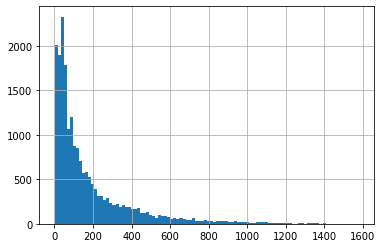

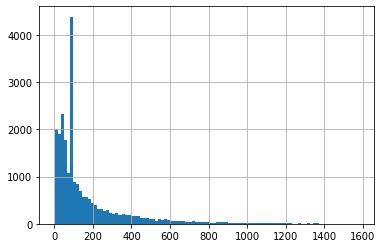

In [ ]:
df['days_exposition'].hist(bins = 100)
plt.show()

df['days_exposition'] = df['days_exposition'].fillna(df[column].median())
df['days_exposition'].hist(bins = 100)
plt.show()

In [ ]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest']/1000, 0)

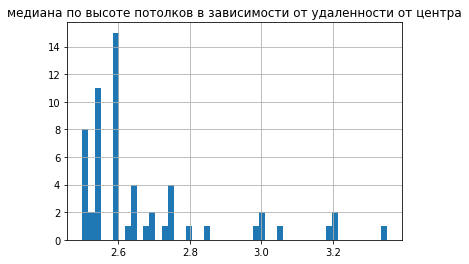

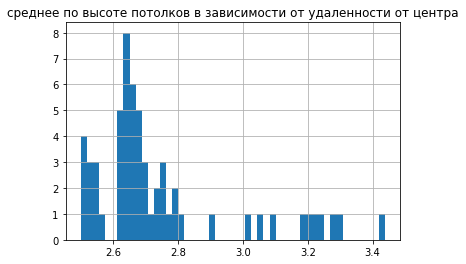

In [ ]:
df.groupby('cityCenters_nearest_km').agg({'ceiling_height': ['median']}).hist(bins = 50)
plt.title('медиана по высоте потолков в зависимости от удаленности от центра')    
plt.show()
df.groupby('cityCenters_nearest_km').agg({'ceiling_height': ['mean']}).hist(bins = 50)
plt.title('среднее по высоте потолков в зависимости от удаленности от центра') 
plt.show()


Глядя на графики распределения медиан и средних значений высоты потолков, видно, что второе подходит зля замены NaNов больше, так как распределение более размыто между значениями. Например пиковое значение на первом зрафике по оси ординат равно 15, а на втором 8.


In [ ]:
gb = df.groupby(['total_area','rooms'])
df['living_area'] = df['living_area'].fillna(gb['living_area'].transform(lambda group: group.mean() / (group.name[0])) * df['total_area'])
df['kitchen_area'] = df['kitchen_area'].fillna(gb['kitchen_area'].transform(lambda group: group.mean() / (group.name[0])) * df['total_area'])

In [ ]:
list_of_nan_numeric = ['living_area',  'kitchen_area', 'airports_nearest', 'days_exposition']

for column in list_of_nan_numeric:
    mean_value = df[column].mean()
    df[column] = df[column].fillna(mean_value)

О значениях столбца is_apartment трудно много сказать. Данных совсем не много. Можно было бы попробовать найти соотношение между значениями True и False (50 : 2725 = 1,83%). Это соотношение можно экстраполировать на всю выборку. Однако я считаю такие меры неоправданными, так как объем изветных данных слишком мал, и к тому же повседневный опыт подсказывает нам, что сегодня продается много больше квартир, чем 2 процента от объема оборота жилой недвижимости. В связи с этим оставляю пропущенные значения нетронутыми. Так как объем данных столбца is_apartment составляет всего 11% значений, его можно не рассматривать (делать по нему заключения не разумно)

In [ ]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Если не указано колличество балконов, скорее всего их нет 

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

In [ ]:
df['locality_name'].value_counts()

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
посёлок Форт Красная Горка        1
деревня Малая Романовка           1
поселок Цвылёво                   1
деревня Терпилицы                 1
деревня Щеглово                   1
Name: locality_name, Length: 364, dtype: int64

Сказать что-то конкретное о пропущенных значениях в колонке locality_name так же сложно, как и со значениями в is_apartment. Однако в данном случае их всего 50, что не сильно меняет ситуацию в любом варианте замены. Есть два варианта развития событий: присоеденить эти значения к анкт-Петербургу или согдать отдельную группу "Неизвестный". Я предпочту второй вариант, так как это позволит остаться чуть более объективнее. К тому же такие значения пропущены скорее всего из-за нестандартных ситуаций, когда дома находятся на стыке нескольких населенных пунктов или вообще за их пределами.

In [ ]:
df['locality_name'] = df['locality_name'].fillna('Неизвестный')

In [ ]:
# проверка
num_of_nan = 0
list_of_nan_2 = []
for i in range(0, len(df.columns)):
    num_of_nan = df[df.columns[i]].isnull().sum()
    if num_of_nan > 0:
        print(df.columns[i], ' : ', num_of_nan)
        list_of_nan_2.append(df.columns[i])

ceiling_height  :  5484
floors_total  :  86
is_apartment  :  20924
cityCenters_nearest  :  5519
parks_around3000  :  5518
parks_nearest  :  15620
ponds_around3000  :  5518
ponds_nearest  :  14589


## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

In [ ]:
df['price_squere_meter'] = round(df['last_price'] / df['total_area'], 0)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squere_meter
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,180.888634,120370.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.000000,82921.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.000000,92786.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,54.0,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.000000,408176.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.000000,100000.0


### День недели, месяц и год публикации объявления

In [ ]:
df['date_year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['date_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['date_weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df.head() # поленилаcь прописать месеца и дни недели (0 = Monday) словами

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squere_meter,date_year,date_month,date_weekday
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,180.888634,120370.0,2019,3,3
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.000000,82921.0,2018,12,1
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.000000,92786.0,2015,8,3
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,54.0,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.000000,408176.0,2015,7,4
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.000000,100000.0,2018,6,1


### Этаж квартиры; варианты — первый, последний, другой

In [ ]:
# функция не сработала, так как работает с переменными, а на вход планировалось подавать столбцы

def floor_location(now_floor, last_floor):
    if now_floor == 1: 
        return 'первый'
    if now_floor == last_floor:
        return 'последний'
    if now_floor < last_floor: 
        return 'другой'

In [ ]:
#df['floor_location'] = df['is_apartment']  # создаем новый столбец строкового типа
#for i in range(0, len(df)):
#    if df['floor'][i] == 1: 
#        df['floor_location'][i] = '1' # первый
#    elif df['floor'][i] == df['floors_total'][i]: 
#        df['floor_location'][i] = '3' # последний
#    elif df['floor'][i] < df['floors_total'][i]: 
#        df['floor_location'][i] = '2' # другой
#df['floor_location'] = pd.to_numeric(df['floor_location'], errors='ignore')
#df.head()

In [ ]:
df['floor_location'] = df['is_apartment']  # создаем новый столбец строкового типа

df['floor_location'] = df.apply(lambda x: floor_location(x['floor'], x['floors_total']), axis = 1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_squere_meter,date_year,date_month,date_weekday,floor_location
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,180.888634,120370.0,2019,3,3,другой
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.000000,82921.0,2018,12,1,первый
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.000000,92786.0,2015,8,3,другой
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,54.0,9,NaN,...,2.0,84.0,3.0,234.0,424.000000,408176.0,2015,7,4,другой
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.000000,100000.0,2018,6,1,другой


### соотношение жилой и общей площади, а также отношение площади кухни к общей

In [ ]:
df['living_per_total'] = round(df['living_area'] / df['total_area'], 2)
df['kitchen_per_total'] = round(df['kitchen_area'] / df['total_area'], 2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_squere_meter,date_year,date_month,date_weekday,floor_location,living_per_total,kitchen_per_total
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,180.888634,120370.0,2019,3,3,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,81.000000,82921.0,2018,12,1,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,2.0,574.0,558.000000,92786.0,2015,8,3,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,54.0,9,NaN,...,3.0,234.0,424.000000,408176.0,2015,7,4,другой,0.34,0.09
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.000000,100000.0,2018,6,1,другой,0.32,0.41


## Исследовательский анализ данных

### Гистограммы по параметрам: площадь, цена, число комнат, высота потолков

гистограмма параметра total_area


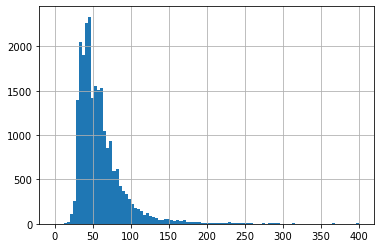

гистограмма параметра last_price


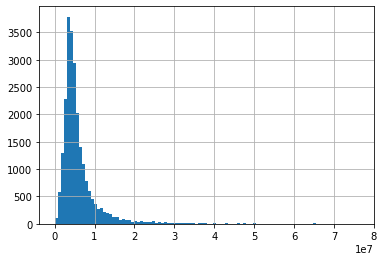

гистограмма параметра rooms


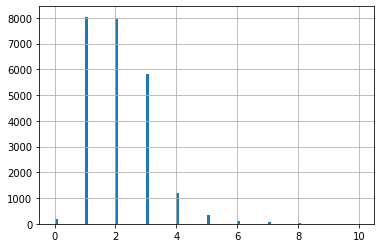

гистограмма параметра ceiling_height


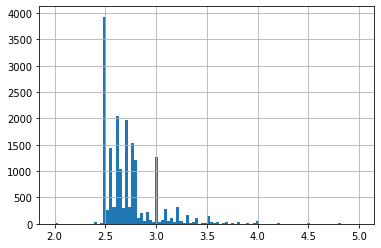

In [ ]:
print('гистограмма параметра {}'.format('total_area'))  
df['total_area'].hist(bins = 100, range = (0, 400))
plt.show()
print('гистограмма параметра {}'.format('last_price'))  
df['last_price'].hist(bins = 100, range = (df['last_price'].min(), df['last_price'].max()/10)) # делю на 2, для увеличения графика в ущерб единичным выбросам
plt.show()
print('гистограмма параметра {}'.format('rooms'))  
df['rooms'].hist(bins = 100, range = (0, 10)) 
plt.show()
print('гистограмма параметра {}'.format('ceiling_height'))  
df['ceiling_height'].hist(bins = 100, range = (2, 5)) 
plt.show()

Как было описано ранее, гистограммы обладают выраженным содством с распределением Пуассона

### Изучение времени продажи квартиры

count    23699.0
mean       169.0
std        207.0
min          1.0
25%         45.0
50%         95.0
75%        199.0
max       1580.0
Name: days_exposition, dtype: float64


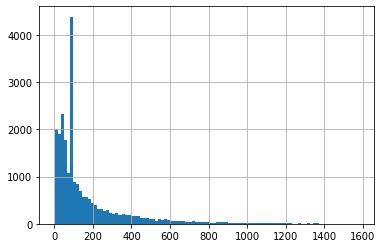

In [ ]:
print(round(df['days_exposition'].describe(), 0))
df['days_exposition'].hist(bins = 100, range = (df['days_exposition'].min(), df['days_exposition'].max()))

Данные о времени продажи квартир весьма разнообразны и колеблятся в диапозоне от 1 до 1580 дней. Среднее значение составляе 169 дней, а медиальное 95, что говорит о сильной неравномерности в данных. Гистограмма визуализирует это утверждение (она далека от нормального распределения, где медиана и среднее значение совпадают). Есть сходство с распределением Пуассона, однако наблюдаются и некоторые выбросы. 

Определить обычные сроки продажи поможет диграмма размаха. Хотя ее можно не строить, так как метод describe уже посчитал все три квартиля. Таким образом можно сказать, диапозон от 45 до 199 дней является типичным для срока продажи. Однако, если посмотреть на график еще раз, то можно понять, что диапозон от 1 до 45 дней имеет доже большую интенсивность, чем промежуток от 45 до 199 дней. увеличим график, для ясности картины

диапазон от 1 до 200 дней


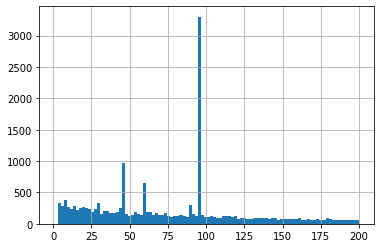

диапазон от 1 до 100 дней


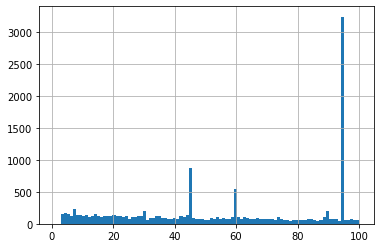

диапазон от 1 до 50 дней


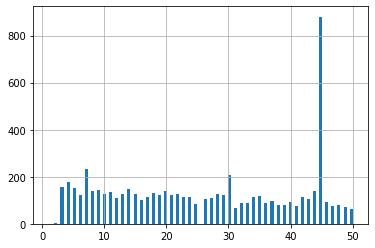

диапазон от 1 до 20 дней


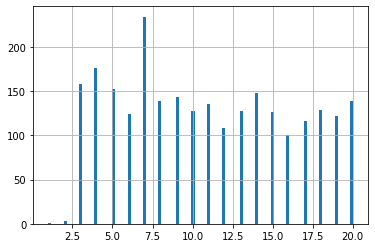

In [ ]:
print('диапазон от 1 до 200 дней')
df['days_exposition'].hist(bins = 100, range = (1, 200))
plt.show()
print('диапазон от 1 до 100 дней')
df['days_exposition'].hist(bins = 100, range = (1, 100))
plt.show()
print('диапазон от 1 до 50 дней')
df['days_exposition'].hist(bins = 100, range = (1, 50))
plt.show()
print('диапазон от 1 до 20 дней')
df['days_exposition'].hist(bins = 100, range = (1, 20))
plt.show()

Первое, что бросается в глаза - смещение пика и его частичное распределние (из-за увеличения числа корзин на единицу площади). И самое главние, последние два графика иллюстрируют резкий скачок колличества продаж за 3 дня публикации. Этот скачок сохраняется (без учета колебаний и пиков) до диапазона продажи в 200 дней. Таким образом можно считать обычным сроком продажи период от 3 до 200 дней. Остальные значения будут считаться очень малыми или необычно большими.

### Уберите редкие и выбивающиеся значения

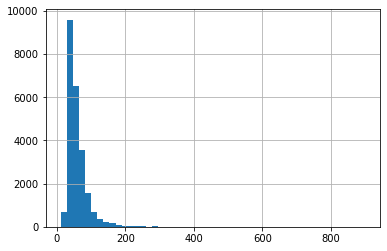

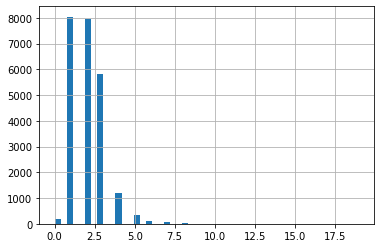

In [ ]:
df['total_area'].hist(bins = 50)
plt.show()
df['rooms'].hist(bins = 50)
plt.show()

In [ ]:
df = df[df['ceiling_height'] > 2.5]
df = df[df['ceiling_height'] < 5]
df = df[df['days_exposition'] < 1400] # почти 4 года
df = df[df['total_area'] < 200] # согласно гистограмме
df = df[df['rooms'] < 6] # согласно гистограмме
df = df[df['cityCenters_nearest'] < 30000] # согласно исследования ниже за пределами 18 км от центра начинается пригород, а за пределами 30 км выбросы

### Факторы, влияющие на стоимость квартиры

In [ ]:
price_dependence = ['total_area', 'rooms', 'cityCenters_nearest', 'date_weekday', 'date_month', 'date_year']
for column in price_dependence:
    print('Зависимость стоимости квартиры от {}'.format(column), round(df['last_price'].corr(df[column]),4))

Зависимость стоимости квартиры от total_area 0.6412
Зависимость стоимости квартиры от rooms 0.3877
Зависимость стоимости квартиры от cityCenters_nearest -0.317
Зависимость стоимости квартиры от date_weekday -0.011
Зависимость стоимости квартиры от date_month 0.0016
Зависимость стоимости квартиры от date_year -0.0374


Сильными связями считаются величины, корреляция между которыми близка к 1 или -1. Как видно из расчетов, наиболее близкая к еденице величина у связи стоимости квартиры с общей площадью, но и она достаточно нелинейна. Таким образом можно предположить, что на стоимость квартиры влият наиболее эффективным образом набор группы характеристик. 

### Населённые пункты с самой высокой и низкой стоимостью жилья

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [ ]:
# группировка по населенному пункту
expensive_locality_name = df.groupby('locality_name').count() 
# расчет средней цены квадратного метра для каждого населенного пункта
expensive_locality_name['price_squere_meter'] = df.groupby('locality_name').sum()['price_squere_meter'] / df.groupby('locality_name').count()['price_squere_meter']
# сортировка населенных пунктов по колличеству объявлений
expensive_locality_name = expensive_locality_name.sort_values(by = 'total_images',ascending = False).head(10)
expensive_locality_name['price_squere_meter']

locality_name
Санкт-Петербург         117714.413054
посёлок Парголово        90834.391941
посёлок Шушары           79888.937759
Пушкин                  112074.938776
Красное Село             72903.483333
посёлок Металлострой     72737.642857
Неизвестный             103693.384615
посёлок Стрельна         87951.760000
Колпино                  68659.000000
Петергоф                100142.500000
Name: price_squere_meter, dtype: float64

Из 10 представленных населенных пунктов, самая высокая стоимость жилья в Санкт-Петербурге, а самая низкая в Выборге.

### Зависимоть стоимости жилья от удаленности от центра Санкт-Петербурга

In [ ]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest']/1000, 0)
piter_flat = df.query('locality_name == "Санкт-Петербург"')

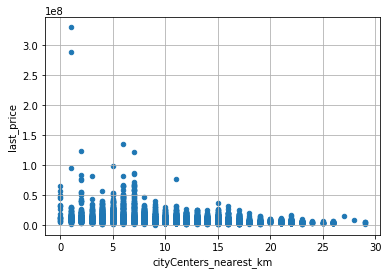

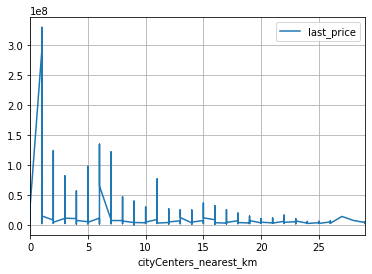

In [ ]:
piter_flat.plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', style='o', grid=True)
plt.show()
piter_flat.sort_values('cityCenters_nearest_km').plot(x='cityCenters_nearest_km', y='last_price', grid=True)

Из диаграмм видно, что в центре стоимость жилья в несколько раз выше, чем на окраине. Есть два характерных скачка: на удаленности в 7 и 18 км. До этих значений гистограмма имеет "плато" с некоторым колличеством выбросов. За пределами радиуса в 18 км от центра стоимость квартир достаточно равномерно снижается. Таким образом можно выделить две значимые величины: в радиусе 7 км от центра располагается центр города, а в радиусе 18 км располагается сам город, далешльше следует окраина.

### Отличаются ли статистика по квартирам в центре от статистики по городу

In [ ]:
piter_centre = df.query('cityCenters_nearest_km < 8')
price_dependence = ['total_area', 'rooms', 'cityCenters_nearest']
cost_centre = 0
cost_city = 0
for column in price_dependence:
    cost_centre = round(piter_centre['last_price'].corr(piter_centre[column]),4)
    cost_city = round(piter_flat['last_price'].corr(piter_flat[column]),4)
    print('Зависимость стоимости квартир в центре от {}'.format(column), cost_centre)
    print('Зависимость стоимости квартир по городу от {}'.format(column), cost_city)
    print('Квантили : {}'.format(round(cost_centre/cost_city, 2)))

Зависимость стоимости квартир в центре от total_area 0.5438
Зависимость стоимости квартир по городу от total_area 0.639
Квантили : 0.85
Зависимость стоимости квартир в центре от rooms 0.2376
Зависимость стоимости квартир по городу от rooms 0.3825
Квантили : 0.62
Зависимость стоимости квартир в центре от cityCenters_nearest -0.0158
Зависимость стоимости квартир по городу от cityCenters_nearest -0.3186
Квантили : 0.05


In [ ]:
def mean_val(column):
    a = df.groupby(column)['last_price'].mean()
    return a

In [ ]:
for el in ['floor_location', 'date_weekday', 'date_month', 'date_year']:
    print(mean_val(el))

floor_location
другой       7.774556e+06
первый       6.340184e+06
последний    8.508365e+06
Name: last_price, dtype: float64
date_weekday
0    7.777710e+06
1    7.765916e+06
2    7.674524e+06
3    8.054251e+06
4    7.467021e+06
5    7.526514e+06
6    7.511509e+06
Name: last_price, dtype: float64
date_month
1     7.900107e+06
2     7.704255e+06
3     7.688325e+06
4     7.777113e+06
5     7.563354e+06
6     7.716254e+06
7     7.689379e+06
8     7.537347e+06
9     7.830125e+06
10    7.389018e+06
11    7.718546e+06
12    8.242869e+06
Name: last_price, dtype: float64
date_year
2014    1.379687e+07
2015    9.252420e+06
2016    7.773119e+06
2017    7.507494e+06
2018    7.347458e+06
2019    8.255032e+06
Name: last_price, dtype: float64



выводы:

1. На первом этаже квартиры дешевле прмерно на 20%. 
2. Стоимость квартир не зависит от месяца и дня недели продажи.
3. Стоимость квартир зависит от года продажи. Самая низкая средня по году стоимость зафиксирована в 2014 году, а самая высокая в 2015. Далее стоимость постепенно снижается


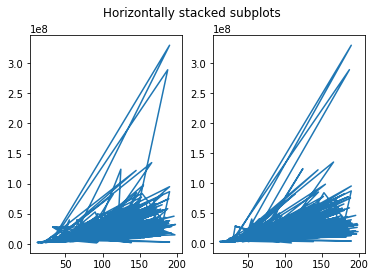

In [ ]:
x = piter_centre['total_area']
y = piter_centre['last_price']
z = piter_flat['total_area']
w = piter_flat['last_price']
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(z, w)

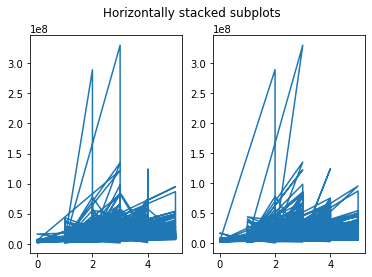

In [ ]:
x = piter_centre['rooms']
y = piter_centre['last_price']
z = piter_flat['rooms']
w = piter_flat['last_price']
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(z, w)

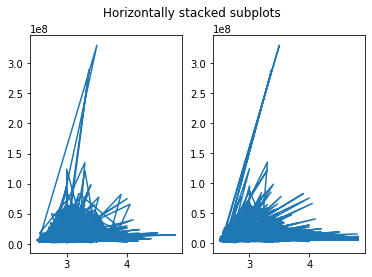

In [ ]:
x = piter_centre['ceiling_height']
y = piter_centre['last_price']
z = piter_flat['ceiling_height']
w = piter_flat['last_price']
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(z, w)

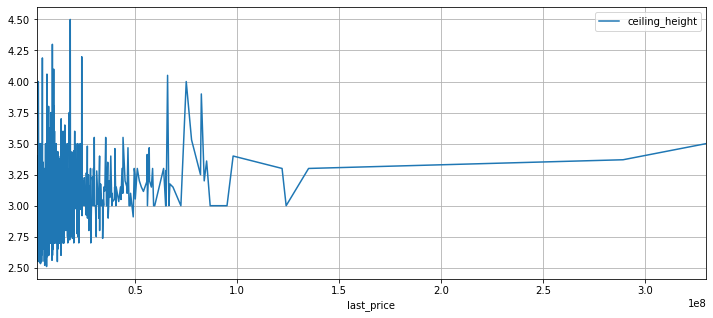

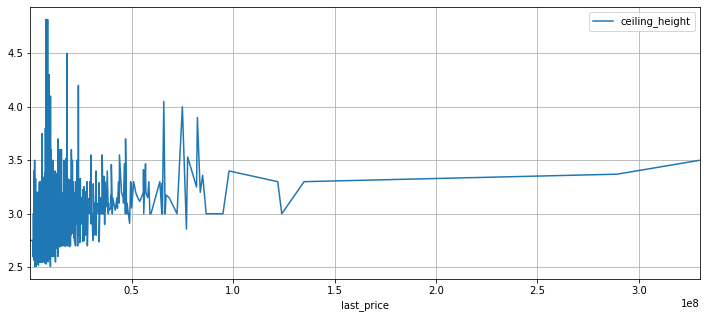

In [ ]:
piter_centre.pivot_table(index='last_price', values='ceiling_height').plot(grid=True, figsize=(12, 5))
piter_flat.pivot_table(index='last_price', values='ceiling_height').plot(grid=True, figsize=(12, 5))

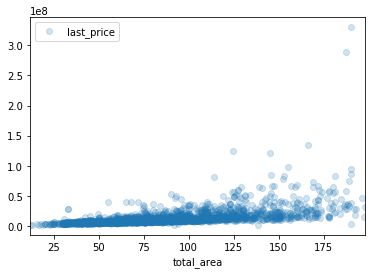

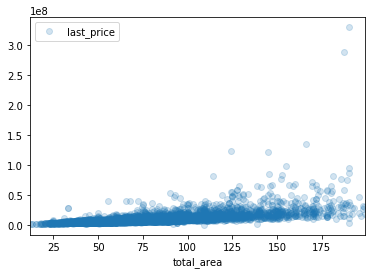

In [ ]:
piter_centre.plot(x = 'total_area', y = 'last_price', style='o', alpha = 0.2)
piter_flat.plot(x = 'total_area', y = 'last_price', style='o', alpha = 0.2)


Значения общей площади квартир в городе превносят основное количество нестандартных значений.


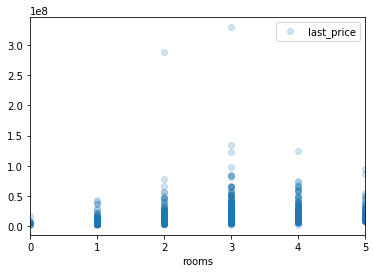

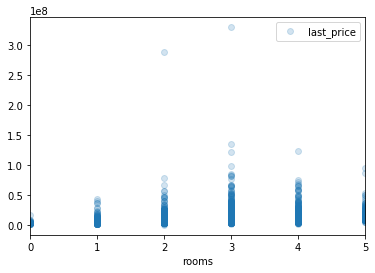

In [ ]:
piter_centre.plot(x = 'rooms', y = 'last_price', style='o', alpha = 0.2)
piter_flat.plot(x = 'rooms', y = 'last_price', style='o', alpha = 0.2)

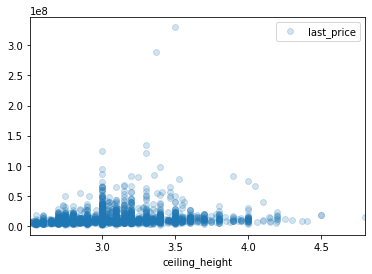

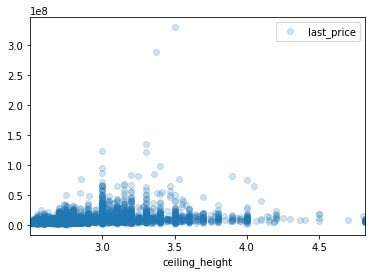

In [ ]:
piter_centre.plot(x = 'ceiling_height', y = 'last_price', style='o', alpha = 0.2)
piter_flat.plot(x = 'ceiling_height', y = 'last_price', style='o', alpha = 0.2)

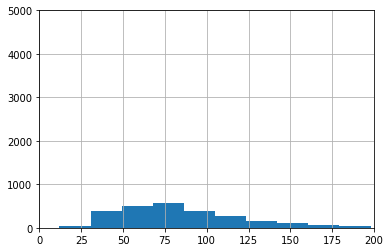

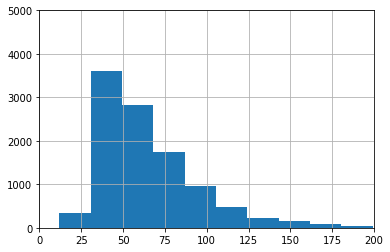

In [ ]:
piter_centre['total_area'].hist()     
plt.xlim(0, 200)
plt.ylim(0, 5000)
plt.show()
piter_flat['total_area'].hist()      
plt.xlim(0, 200)
plt.ylim(0, 5000)
plt.show()

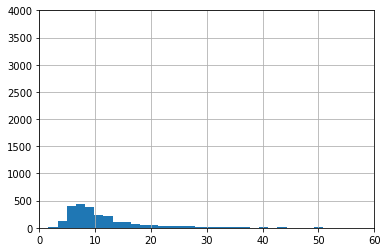

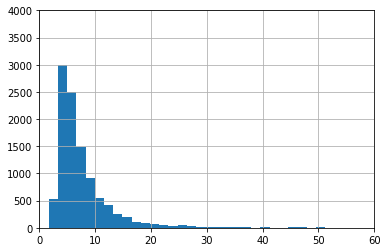

In [ ]:
a = piter_centre['last_price']/1000000
b = piter_flat['last_price']/1000000
a.hist(bins = 200)  
plt.xlim(0, 60)
plt.ylim(0, 4000)
plt.show()
b.hist(bins = 200)  
plt.xlim(0, 60)
plt.ylim(0, 4000)
plt.show()

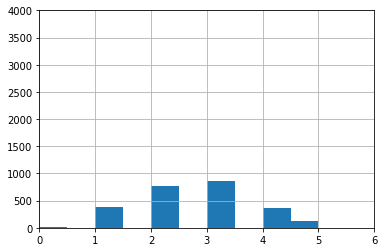

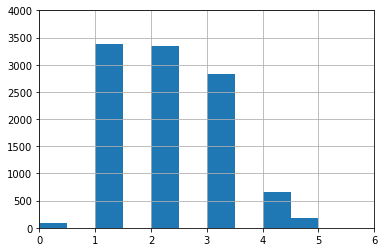

In [ ]:
piter_centre['rooms'].hist()                                                                                   
plt.xlim(0, 6)
plt.ylim(0, 4000)
plt.show()
piter_flat['rooms'].hist()             
plt.xlim(0, 6)
plt.ylim(0, 4000)
plt.show()

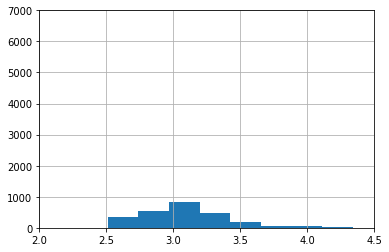

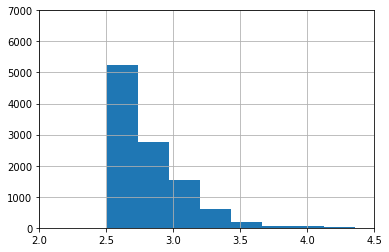

In [ ]:
piter_centre['ceiling_height'].hist() 
plt.xlim(2, 4.5)
plt.ylim(0, 7000)
plt.show()
piter_flat['ceiling_height'].hist()      
plt.xlim(2, 4.5)
plt.ylim(0, 7000)
plt.show()



1. общая площадь. Пик первого графика смещен в право на 75 м^2. Тогда как по городу он находится на 40 м^2. Это связано с тем, что застройка последних лет подразумевает небольшие квартиры.
    
2. Цена. Цена по городу и в центре имеют очень схожий характер распределения с пиками примерно в одном месте.
    
3. Колличество комнат. Колличество комнат подтверждает результаты с площадями. В центре больше квартир с большими площадями, соответственно в них и комнат больше. стоит отметить, что почти все 5ти комнатные квартиры находятся в центре
    
4. Высота потолков. Высота потолков потолков имеет ту же тенденцию, что и площади и колличество комнат.


Рассматривая выводы, можно сказать, что различия есть (иногда значения отличаютс в несколько десятков раз), однако они не существенны в масштабе сравнения с 1 или -1. Поэтому можно сказать что зависимость стоимости жилья в ценитре от разных параметров не сильно отличается от стоимости жилья по городу от тех же параметров.

### Эксперимент

In [ ]:
# мне стало интересно проверить наличие зависимостей по времени продажи квартиры.
exposition_dependence = ['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'cityCenters_nearest_km']
cost_centre_dob = 0
cost_city_dob = 0
for column in exposition_dependence:
    cost_centre_dob = round(piter_centre['days_exposition'].corr(piter_centre[column]),4)
    cost_city_dob = round(piter_flat['days_exposition'].corr(piter_flat[column]),4)
    print('Зависимость времени продажи квартир в центре от {}'.format(column), cost_centre_dob)
    print('Зависимость времени продажи квартир по городу от {}'.format(column), cost_city_dob)
    print('Квантили : {}'.format(round(cost_centre_dob/cost_city_dob, 2)))

Зависимость времени продажи квартир в центре от last_price 0.0368
Зависимость времени продажи квартир по городу от last_price 0.0768
Квантили : 0.48
Зависимость времени продажи квартир в центре от total_area 0.1249
Зависимость времени продажи квартир по городу от total_area 0.1404
Квантили : 0.89
Зависимость времени продажи квартир в центре от rooms 0.0995
Зависимость времени продажи квартир по городу от rooms 0.1077
Квантили : 0.92
Зависимость времени продажи квартир в центре от cityCenters_nearest -0.0349
Зависимость времени продажи квартир по городу от cityCenters_nearest -0.1117
Квантили : 0.31
Зависимость времени продажи квартир в центре от cityCenters_nearest_km -0.0385
Зависимость времени продажи квартир по городу от cityCenters_nearest_km -0.1116
Квантили : 0.34


Однако эксперемент принес не много пользы. Наиболее сильная связь оказалась между сроком продажи и годом продажи. Довольно любопытный момент, который может быть связан с экономической ситуацией

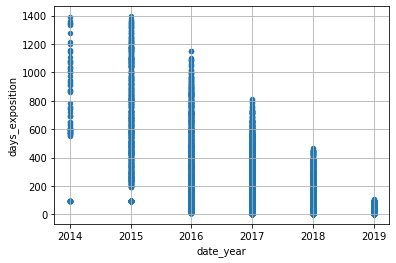

In [ ]:
piter_flat.plot(x='date_year', y='days_exposition', kind='scatter', style='o', grid=True)

А вот этот график уже весьма интресен. Мы видим значительное и равномерное снижение срока продажи с каждым последующим годом. Думаю что может быть связано с уеличением доступности информации и развитием материального благосостояния. Также можно заметить, что в 2014 году точки распалагаются реже чем в остальных случаях. Это вынуждает взлянуть на колличество размещенных обьявлений по годам

In [ ]:
piter_flat['date_year'].value_counts()

2017    3700
2018    3577
2019    1314
2016    1233
2015     594
2014      77
Name: date_year, dtype: int64

In [ ]:
df['date_year'].corr(df['days_exposition'])

-0.5891848114312531

видно, что пик объявлений о продаже квартир был в 2017, до этого наблюдался рост, а после падение. Возможно это зависит от стоимости жилья. 

корреляция не сильно высокая, но определенная зависимость присутствует

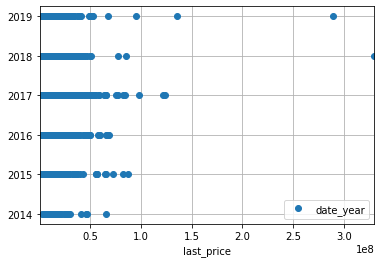

In [ ]:
df.plot(x='last_price', y='date_year', style='o', grid=True)

In [ ]:
df['date_year'].corr(df['last_price'])

-0.03739010309428835

И действительно, без учета выбросов, на графике наблюдается рост цен на жилье до 2017 года и последующее их снижение. А вот значение корреляции утверждает об отсутствии какой либо зависимости

## Общий вывод

Данные оказались достаточно чистыми. Единственное серьезное препятствие заключалось в неправильных типах данных, так как со строковыми данными невозможно производить неободимые вычисления. Однако эта неприятность легко устранима. 

Практически в каждом праметре были интересные, но не многочисленные выбросы. Это позволило не сильно заморачиваться с их устранением.

Получила любопытный опыт с масштабами гистограмм (их определенно неудобно применять в цикле).

И самое интересное: 
* цена квартиры зависит от ее прощади
* цена квартиры зависит от ее расположения
* цена квартиры зависит от ее расположения
* срок продажи зависит от года продажи
* Цена продажи зависит от года продажи